# Project Proposal
---

## 1.0 Introduction

In [1]:
# load libraries and set seed value
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read data set from GitHub
crime_data_raw <- read_csv("https://github.com/jburden1/STAT201_Project_Group14/raw/main/vpd_crime_data/crimedata_csv_AllNeighbourhoods_AllYears.csv")
head(crime_data_raw)

Rows: 854615 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2018,3,22,9,0,19XX TRIUMPH ST,Grandview-Woodland,495329.0,5459026
Theft from Vehicle,2004,4,6,7,0,19XX TRIUMPH ST,Grandview-Woodland,495341.2,5459026
Theft from Vehicle,2003,2,24,0,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2019,8,19,16,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2018,11,8,1,0,19XX TRIUMPH ST,Grandview-Woodland,495356.6,5459026
Theft from Vehicle,2005,10,15,12,0,19XX TRIUMPH ST,Grandview-Woodland,495357.0,5459017


[1] "Theft from Vehicle"                                    
 [2] "Theft of Bicycle"                                      
 [3] "Theft of Vehicle"                                      
 [4] "Vehicle Collision or Pedestrian Struck (with Fatality)"
 [5] "Vehicle Collision or Pedestrian Struck (with Injury)"  
 [6] "Break and Enter Commercial"                            
 [7] "Break and Enter Residential/Other"                     
 [8] "Homicide"                                              
 [9] "Mischief"                                              
[10] "Offence Against a Person"                              
[11] "Other Theft"

[1] "Grandview-Woodland"        "Kitsilano"                
 [3] "Victoria-Fraserview"       "Strathcona"               
 [5] "Shaughnessy"               "Arbutus Ridge"            
 [7] "Kerrisdale"                "West End"                 
 [9] "Central Business District" "West Point Grey"          
[11] "Mount Pleasant"            "Hastings-Sunrise"         
[13] "Renfrew-Collingwood"       "Riley Park"               
[15] "Sunset"                    "Musqueam"                 
[17] "Marpole"                   "Oakridge"                 
[19] "Stanley Park"              "Fairview"                 
[21] "Kensington-Cedar Cottage"  "Killarney"                
[23] "Dunbar-Southlands"         "South Cambie"             
[25] NA

TYPE,n
<chr>,<int>
Theft from Vehicle,238164
Other Theft,211037
Mischief,102864
Offence Against a Person,74166
Break and Enter Residential/Other,71701
Break and Enter Commercial,46622
Theft of Vehicle,44431
Theft of Bicycle,36442
Vehicle Collision or Pedestrian Struck (with Injury),28537


`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


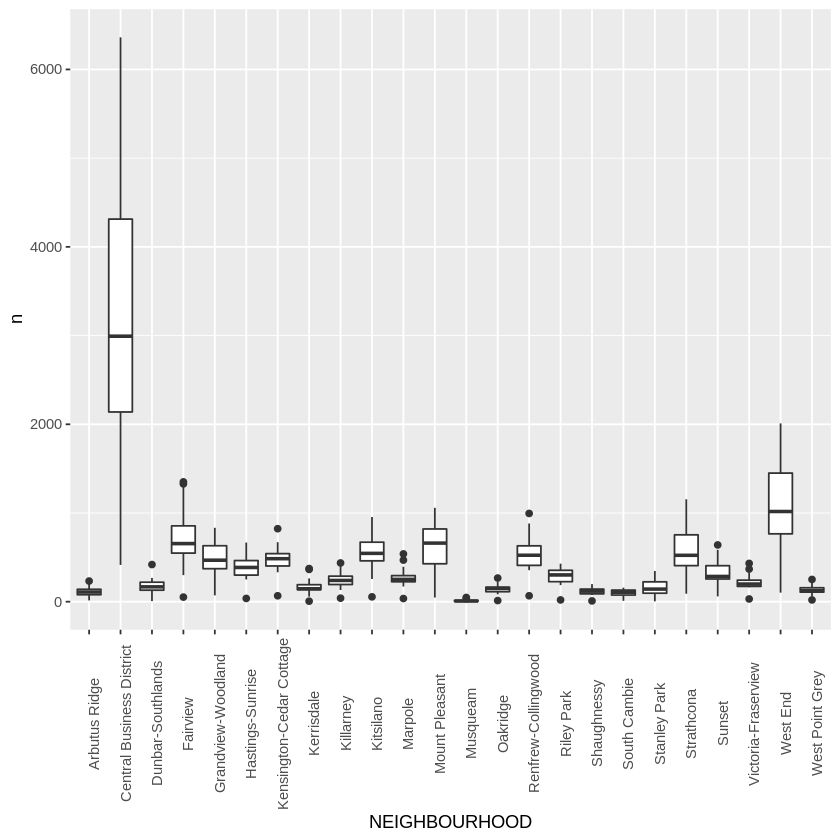

In [15]:
unique(crime_data_raw$TYPE)
unique(crime_data_raw$NEIGHBOURHOOD)
summary <- crime_data_raw |> 
    group_by(TYPE) |> 
    summarize(n = n()) |>
    arrange(desc(n))
summary

summary_theft <- crime_data_raw |> 
    filter(TYPE == "Theft from Vehicle") |> 
    group_by(YEAR, NEIGHBOURHOOD) |>
    summarize(n = n()) |>
    ggplot(aes(x = NEIGHBOURHOOD, y = n)) +
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90))
summary_theft

## 2.0 Preliminary Results

## 3.0 Methods: Plan

## 4.0 References